In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [12]:
import yfinance as yf

In [13]:
!pip install yfinance


In [14]:
NUM_TRADING_DAYS= 252

NUM_SIMULATIONS = 1000

stocks = ["RELIANCE.NS","TCS.NS","HINDUNILVR.NS","HDFCBANK.NS","ITC.NS","LT.NS","INFY.NS"]

Start_date ="2018-10-01"
end_date="2023-10-01"


In [15]:
stock_data = {}

for stock in stocks:
  ticker = yf.Ticker(stock)
  stock_data[stock] = ticker.history(start = Start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

In [16]:
stock_prices

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,1197.153442,2019.448608,1513.858643,982.032654,246.232315,1140.846191,645.737122
2018-10-03 00:00:00+05:30,1171.299438,1936.451904,1492.242676,979.958069,244.657562,1138.423706,630.040161
2018-10-04 00:00:00+05:30,1090.772949,1848.665771,1450.853760,944.545166,237.944412,1149.804077,611.619019
2018-10-05 00:00:00+05:30,1019.431885,1882.553589,1436.658569,948.187805,229.159286,1121.925049,626.667297
2018-10-08 00:00:00+05:30,1078.283569,1860.080566,1437.395874,938.393799,226.424316,1110.910278,617.889160
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,2340.449951,3567.917969,2475.850098,1531.000000,442.600006,2902.500000,1474.150024
2023-09-26 00:00:00+05:30,2342.500000,3576.445801,2478.949951,1537.650024,442.450012,2912.550049,1460.650024
2023-09-27 00:00:00+05:30,2368.899902,3580.036621,2501.750000,1526.849976,449.149994,2965.050049,1467.000000


In [17]:
log_returns = np.log(stock_prices / stock_prices.shift(1))

In [18]:
log_returns

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-03 00:00:00+05:30,-0.021833,-0.041967,-0.014382,-0.002115,-0.006416,-0.002126,-0.024609
2018-10-04 00:00:00+05:30,-0.071227,-0.046393,-0.028128,-0.036806,-0.027822,0.009947,-0.029674
2018-10-05 00:00:00+05:30,-0.067641,0.018165,-0.009832,0.003849,-0.037620,-0.024546,0.024306
2018-10-08 00:00:00+05:30,0.056125,-0.012009,0.000513,-0.010383,-0.012007,-0.009866,-0.014107
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.006176,-0.007381,-0.002662,0.000882,-0.001129,-0.005497,-0.014814
2023-09-26 00:00:00+05:30,0.000876,0.002387,0.001251,0.004334,-0.000339,0.003457,-0.009200
2023-09-27 00:00:00+05:30,0.011207,0.001004,0.009155,-0.007049,0.015029,0.017865,0.004338


In [19]:
log_returns = log_returns[1:]

In [20]:
print(log_returns.mean() * NUM_TRADING_DAYS)

RELIANCE.NS      0.137190
TCS.NS           0.113347
HINDUNILVR.NS    0.099529
HDFCBANK.NS      0.089981
ITC.NS           0.120480
LT.NS            0.198878
INFY.NS          0.163002
dtype: float64


In [21]:
print(log_returns.std() * np.sqrt(NUM_TRADING_DAYS))

RELIANCE.NS      0.313954
TCS.NS           0.253070
HINDUNILVR.NS    0.238601
HDFCBANK.NS      0.270058
ITC.NS           0.265032
LT.NS            0.283981
INFY.NS          0.292504
dtype: float64


In [22]:
portfolio_weights=[]
portfolio_returns=[]
portfolio_risks=[]

In [23]:
for _ in range(NUM_SIMULATIONS):
  w = np.random.random(len(stocks))
  w /= np.sum(w)
  portfolio_weights.append(w)
  port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS
  portfolio_returns.append(port_return)
  port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
  portfolio_risks.append(port_risk)


In [24]:
portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

In [25]:
portfolios = pd.DataFrame({"Return": portfolio_returns, "Risk": portfolio_risks, "Sharpe Ratio": portfolio_returns / portfolio_risks})
portfolios

,Return,Risk,Sharpe Ratio
0,0.123763,0.185497,0.667194
1,0.128996,0.186205,0.692763
2,0.139340,0.188536,0.739062
3,0.121395,0.179706,0.675520
4,0.133564,0.181293,0.736730
...,...,...,...
995,0.139374,0.193556,0.720071
996,0.136876,0.192588,0.710718
997,0.133530,0.194618,0.686113
998,0.132427,0.194415,0.681155


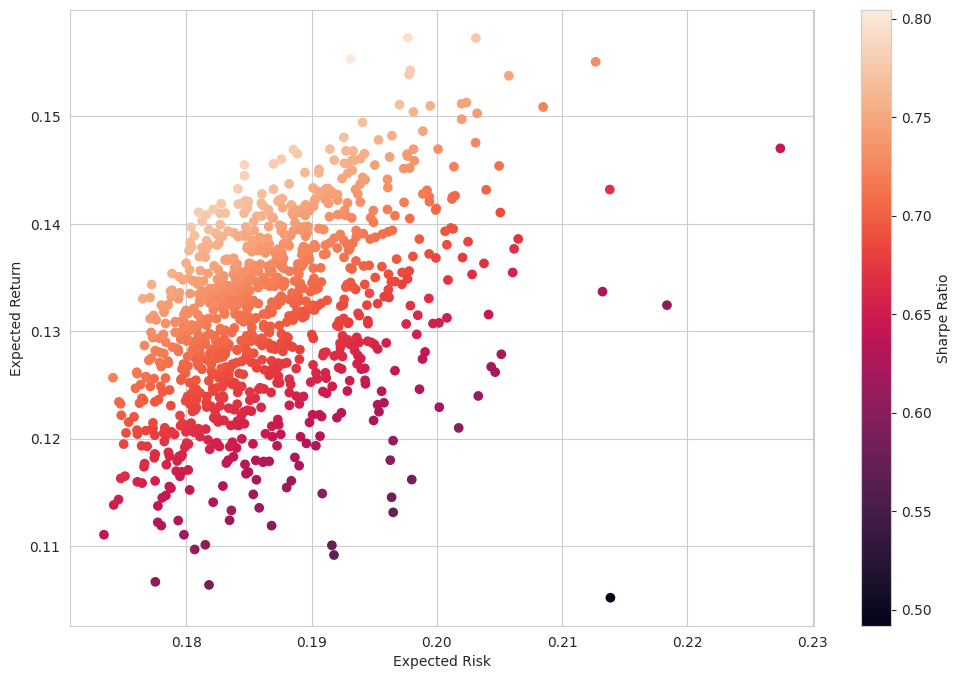

In [27]:
plt.figure(figsize = (12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.show()

In [28]:
sharpe_ratios = portfolio_returns / portfolio_risks

ind = 0

for i in range(len(sharpe_ratios)):
  if sharpe_ratios[i] == np.amax(sharpe_ratios):
    ind = i

In [29]:
sharpe_ratios[ind]


0.804479833218804

In [30]:
portfolio_returns[ind]


0.15535408844274257